**Qingbo Liu**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [28]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov
import pca_svd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Implement PCA using singular value decomposition (SVD)

Implement and test the following methods necessary to perform PCA in `pca_svd.py`.

- `pca`: Perform PCA on the data using the SVD approach.

### 3a) Test SVD PCA with Iris dataset

- Load in the Iris dataset.
- Create a `PCA_SVD` object called `pca`, based on the iris data.

In [2]:
# Create PCA_SVD object here
iris_data = pd.read_csv('data/iris.csv')
pca = pca_svd.PCA_SVD(iris_data)

In [3]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (149, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n [ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (149, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.545

#### Verify PCA projection

- Project the data onto the first two principal components, then create a scatter plot below showing the results.

Your scatterplot should look exactly like the one you made using the covariance matrix approach to PCA.

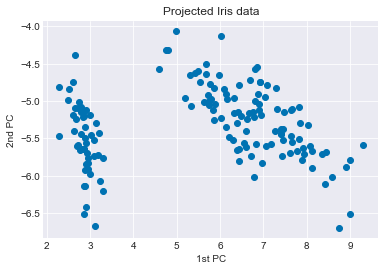

In [4]:
projected = pca.pca_project([0, 1])

fig, ax = plt.subplots()
ax.scatter(pca.A_proj[:, 0], pca.A_proj[:, 1])
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
_ = ax.set_title('Projected Iris data')

## Task 4: Eigenfaces. Perform PCA on face images using the SVD method

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [5]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html13231
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

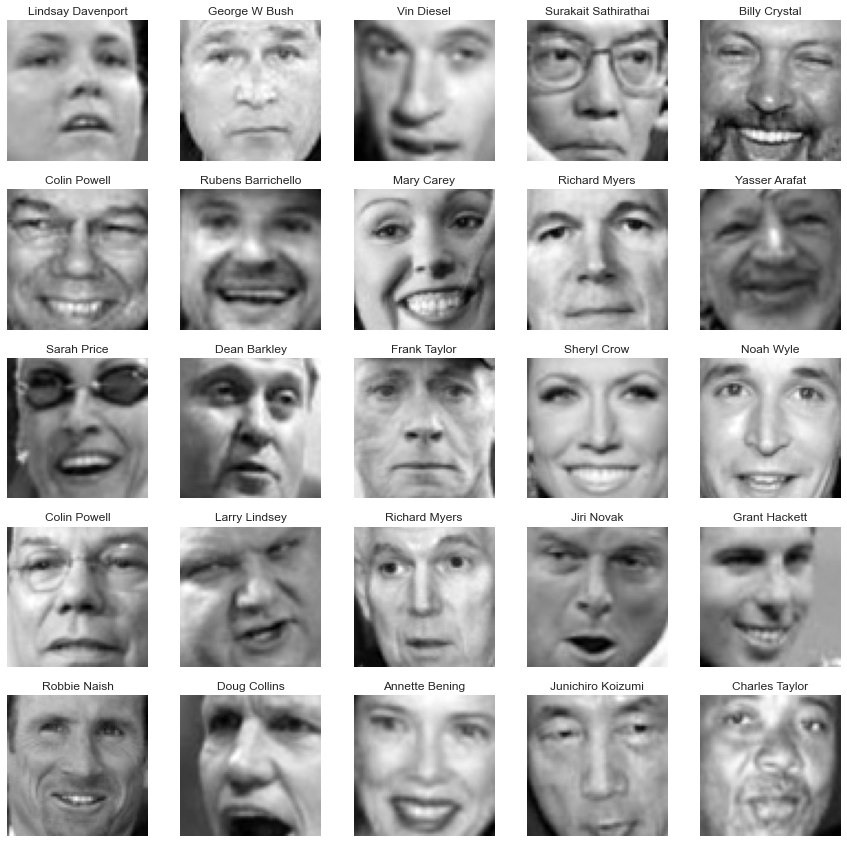

In [6]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    if len(face_imgs) < 25 or len(face_names) < 25:
        raise ValueError(f'give at least 25 faces and names')
    
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

    for i in range(5):
        for j in range(5):
            axes[i, j].imshow(face_imgs[i*5+j], cmap=plt.get_cmap('gray'))
            axes[i, j].set_title(face_names[i*5+j])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            
    
face_plot(face_imgs, face_names)

### 4c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

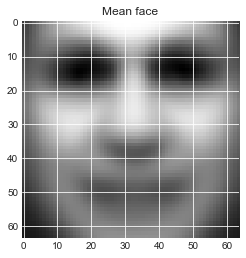

In [7]:
mean_face = face_imgs.reshape([13231, 64*64]).mean(axis=0).reshape([64, 64])

fig, ax = plt.subplots()
ax.imshow(mean_face, cmap=plt.get_cmap('gray'))
_ = ax.set_title('Mean face')

**Question 6:** What does the "mean face" image represent?

**Question 6 answer:** Numerically it is the mean of all faces in the dataset. Thus it represents the average feature of the data set at each pixel. 

### 4d) Preprocess face data

Currently, the face data has shape = `(13231, 64, 64)`. To run PCA, we'll need to "unravel" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.

- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [8]:
# Your reshape code here
face_imgs_vec = face_imgs.reshape([13231, 64*64])

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e) Perform PCA (SVD) on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_SVD` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [9]:
import time

faces = pd.DataFrame(data=face_imgs_vec)
pca_svd_method = pca_svd.PCA_SVD(faces)

vars = [i for i in range(64*64)]
start_time = time.monotonic()
pca_svd_method.pca(vars)
end_time = time.monotonic()

print(f'Takes {end_time-start_time} seconds to run PCA using SVD')

Takes 96.78932281899999 seconds to run PCA using SVD


### 4f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

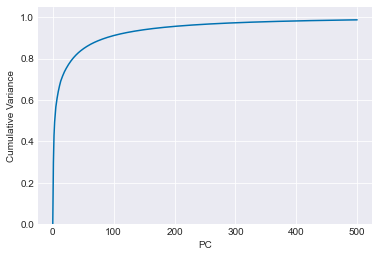

In [10]:
pca_svd_method.elbow_plot(num_pcs_to_keep=500)

### 4g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [245]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    reconstucted_imgs += np.mean(face_imgs_vec, axis=0)
    imgs = reconstucted_imgs[:25, :].reshape([25, 64, 64])
    
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

    for i in range(5):
        for j in range(5):
            axes[i, j].imshow(imgs[i*5+j], cmap=plt.get_cmap('gray'))
            axes[i, j].set_title(face_names[i*5+j])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

#### 50% variance face grid

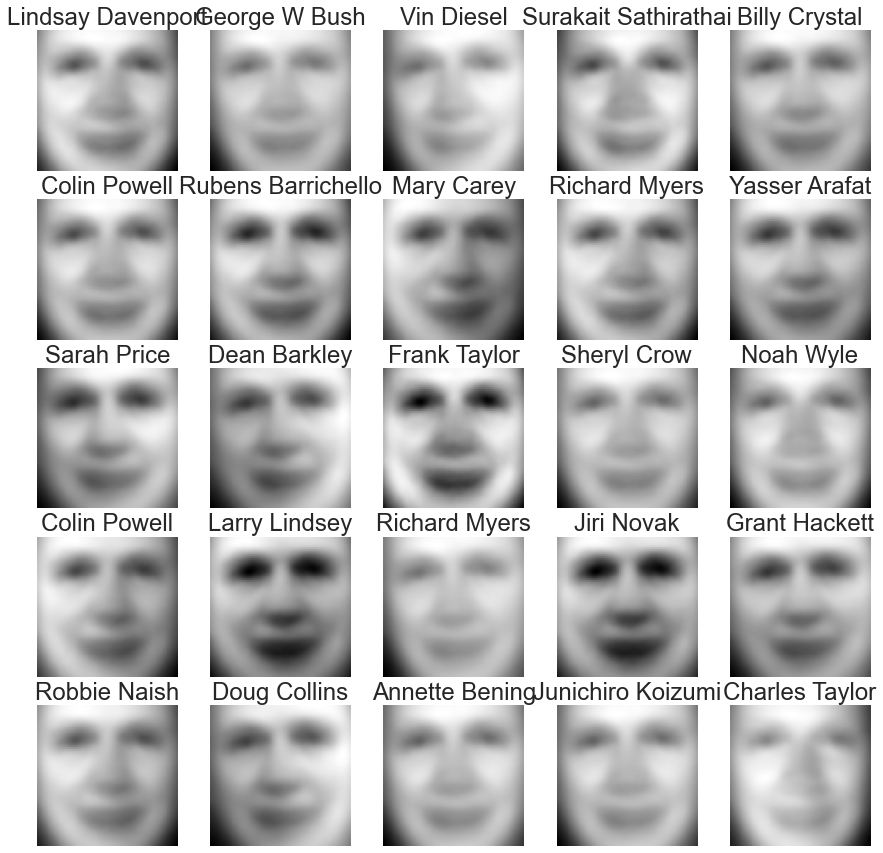

In [246]:
projected = pca_svd_method.pca_then_project_back(4)
make_imgs(projected)

#### 70% variance face grid

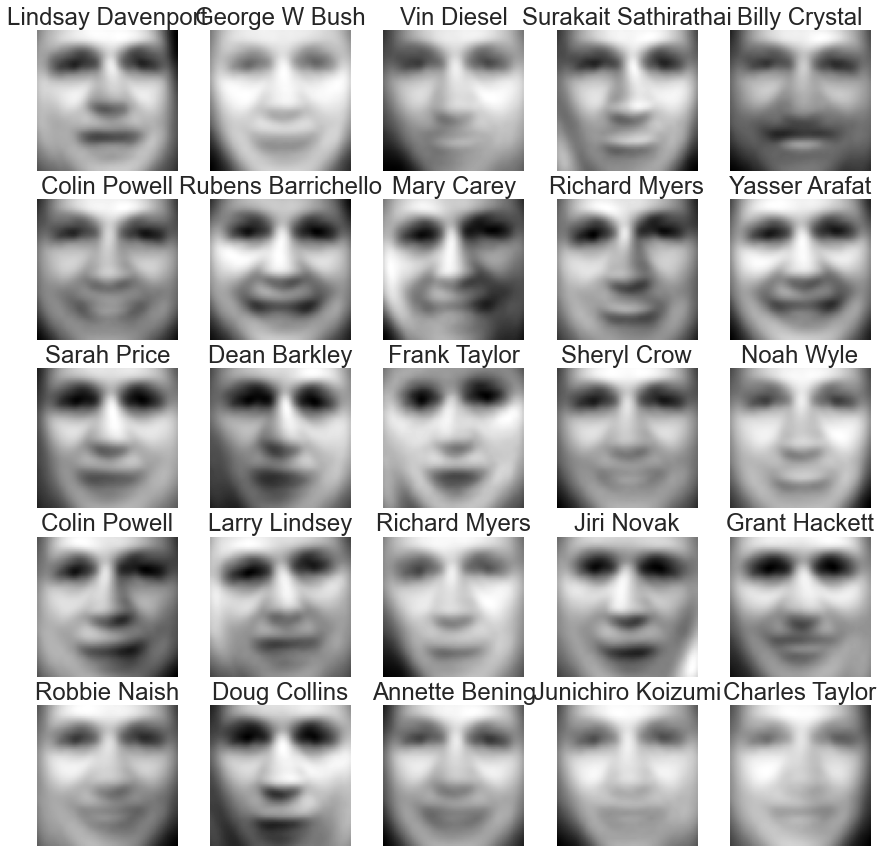

In [247]:
projected = pca_svd_method.pca_then_project_back(17)
make_imgs(projected)

#### 80% variance face grid

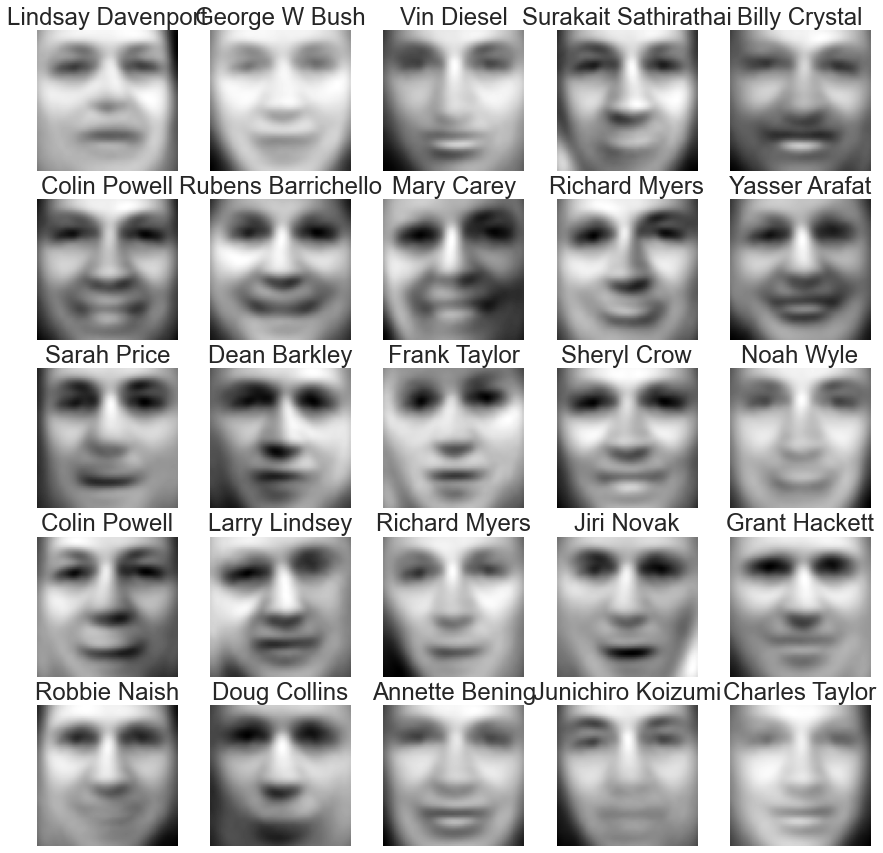

In [248]:
projected = pca_svd_method.pca_then_project_back(30)
make_imgs(projected)

#### 95% variance face grid

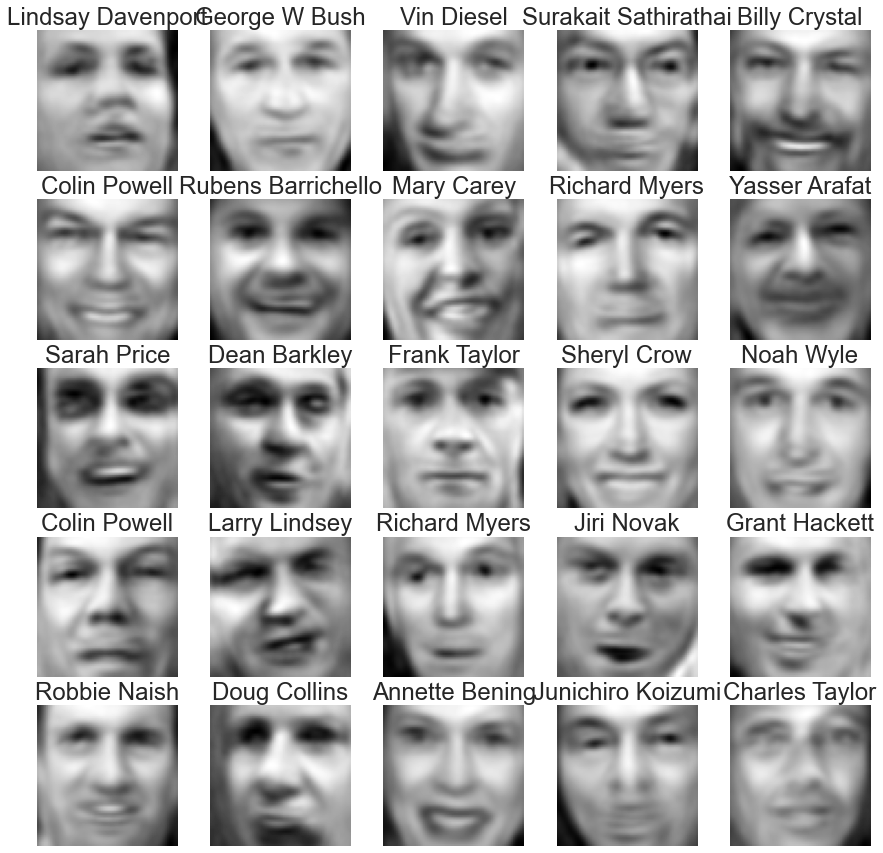

In [249]:
projected = pca_svd_method.pca_then_project_back(180)
make_imgs(projected)

**Question 7:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 7 answer:** As the proportion of variance increases, the reconstructed faces become closer to the original face. This indicates that the amount of information lost gradually becomes smaller and smaller with greater variance.

## Task 5: Compare covariance matrix and SVD approaches on the face dataset

### 5a) Time comparison with covariance matrix method

- In the cell below, run PCA on the face data using the convariance matrix method. Time the processing time in `pca` using the `time` module, like you did in Task 4 with SVD. 

In [16]:
import time

faces = pd.DataFrame(data=face_imgs_vec)
pca_cov_method = pca_cov.PCA_COV(faces)

vars = [i for i in range(64*64)]
start_time = time.monotonic()
pca_cov_method.pca(vars)
end_time = time.monotonic()

print(f'Takes {end_time-start_time} seconds to run PCA using covariance')

Takes 37.472527826000004 seconds to run PCA using covariance


**Question 8:** How many seconds did it take to process the face dataset with the covariance method? How about with the SVD method? **Include both numbers, along with units**.

**Question 8 answer:** It takes 96.78 seconds to run SVD and 37.47 seconds to run COV. Surprisingly, COV is almost twice as fast as SVD. 

### 5b) Stability comparison

In the cell below compute the difference between:
- eigenvalues
- eigenvectors

obtained from the two approaches. Sum up the **absolute differences** and print out the resulting float value.

In [17]:
diff_e_vecs = np.sum(np.absolute(pca_svd_method.e_vecs - pca_cov_method.e_vecs))
diff_e_vals = np.sum(np.absolute(pca_svd_method.e_vals - pca_cov_method.e_vals))

print(f'difference in eigenvalues: {diff_e_vals}, difference in eigenvectors {diff_e_vecs}')

difference in eigenvalues: 3.789290194122774e-08, difference in eigenvectors 287371.92869415705


**Question 9:** If you consider SVD as producing the "correct" result, what do the above float value discrepencies obtained between the two methods mean?

**Question 9 answer:** Covariance matrix method used to obtain eigenvectors is numerically unstable given large data size, as The sum of absolute difference in eigenvectors is 287371. Note that the difference in eigenvalues is very small, and so both methods are able to obtain accurate eigenvalues. The reason for this big difference might be due to the numerical unstability of pseudo-inverse algorithm used to decompose covaraince matrix. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, loading plot, proportion variance explained, etc) to inform your analysis and exploration. 
- Do PCA and SVD based PCA yield different results?

I used [financial indicators dataset](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018#2016_Financial_Data.csv) from Kaggle that gives over 100 financial indicators of publicly traded companies. This is a perfect example for using PCA reduction because there are too many variables, many of which are related, e.g. Revenue and Gross Profit are strongly related to each other. 



### Data Analysis 

Below is listed the first 5 samples of the dataset. 

In [18]:
fin_data = pd.read_csv('data/Financial_Data.csv')
fin_data.fillna(0, inplace=True)
print(f'5 five samples: \n{fin_data.head(5)}')

pca = pca_svd.PCA_SVD(fin_data)

5 five samples: 
  Listing       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1    VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2      KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3     RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4     GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0           0.0  2.146100e+10        2.146100e+10      1.391000e+10   
1   108330319.7  3.441414e+08        7.939267e+08      1.345959e+08   
2           0.0  1.519600e+10        1.751200e+10      2.725000e+09   
3           0.0  6.561162e+09        6.586482e+09      7.372520e+08   
4           0.0  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      7.090000e+08  ...       

In [19]:
# run PCA 
headers = fin_data.columns

indices_to_drop = [] 
for i, t in enumerate(fin_data.dtypes):
    if t == 'float64':
        continue 
    else:
        indices_to_drop.append(i)

for i, idx in enumerate(indices_to_drop):
    headers = headers.delete(idx-i)


pca.pca(headers)


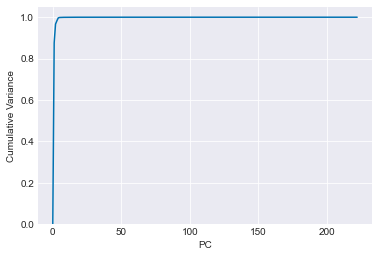

In [20]:
pca.elbow_plot()

We can cleraly see from the elbow plot above that most variables account only for very tiny bit of variance and can be discarded. Thus if we zoom in the elbow plot and take a closer look at the first tew PCs. 


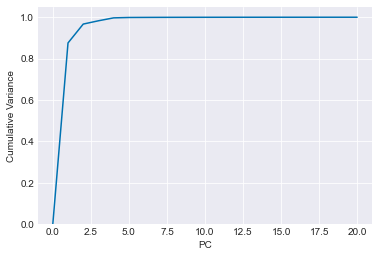

In [21]:
pca.elbow_plot(20)

We can see that even though we have over 200 indicators of a company's financial health, what's needed to get a rough sense of their financial state is just 3 PCs and the 3 PCs account for almost 99% of variance in the data. This indicates that the majority of financial indicators are strongly associated with each other and thus are not ncessary in data analysis. 

Next we project the data onto the first three PCs and make a 1x3 grid plots. 

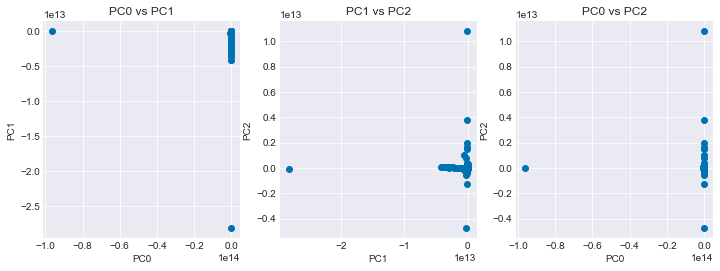

In [22]:
projected = pca.pca_project([0, 1, 2])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].scatter(projected[:, 0], projected[:, 1])
axes[0].set_xlabel('PC0')
axes[0].set_ylabel('PC1')
axes[0].set_title('PC0 vs PC1')

axes[1].scatter(projected[:, 1], projected[:, 2])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('PC1 vs PC2')

axes[2].scatter(projected[:, 0], projected[:, 2])
axes[2].set_xlabel('PC0')
axes[2].set_ylabel('PC2')
_ = axes[2].set_title('PC0 vs PC2')

The data looks surprisingly dense, as data points are cornered together on the picture instead of being spread out. But still, the data presents a pattern here. In the first plot, the majority of data forms a vertical line, which suggests that PC0 and PC1 are not associated at all and to me this looks to be a good news as this pattern demonstrates that PCA has successfully found bases that are orthogonal to each other. The plot 'PC0 vs PC2' follows the same pattern. On the other hand, plot 'PC1 vs PC2' is sightly different, meaning that PC1 and PC2 might be weakly related to each other. (Note: the association between PCs that I am talking about here is not defined in a formal way but just a way that I use to describe the relationship between those PCs). 

Overall, PCA proves to be very useful in reducing the number of dimensions that are necessary to interpret the core meaning of data. 

### Comparison between covariance and SVD

Next, we try covariance approach on the data and see how that performs relative to SVD approach, with the assumption that SVD gives the most accurate answer. 

In [23]:
pca_c = pca_cov.PCA_COV(fin_data)
pca_c.pca(headers)

In [24]:
diff_e_vecs = np.sum(np.absolute(pca.e_vecs - pca_c.e_vecs))

print(f'absolute difference in eigenvectors is {diff_e_vecs}')

absolute difference in eigenvectors is 1016.6120026101897


From the previous comparison we know that the absolute difference in eigenvalues between the two methods is not large. So here we just compute the difference in eigenvectors. Note that difference of 1016 is still very large, again demonstrating the superiority of SVD method. 
Since both methods are very fast here, comparison of the efficiency will not be very instructive here. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

I will run PCA on a flower image in the code below. The photo is displayed below.

Note that to run the cell below, `Pillow` package needs to be installed, or otherwise errors about missing package will be reported. 

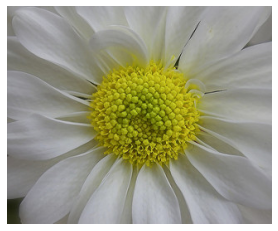

In [213]:
img = plt.imread('data/flower.jpg', format='jpeg')
H, W, _ = img.shape


_, ax = plt.subplots()
ax.imshow(img)
ax.set_xticks([])
_ = ax.set_yticks([])

Without loss of generality we convert the image with rgb colors into grayscale image by averaging the channels of each pixel. Note thtat Rgb colors can be handled by running PCA on each channel.

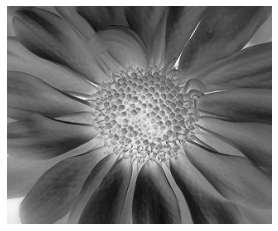

In [234]:
img_gray = np.mean(img, axis=2)

_, ax = plt.subplots()
ax.imshow(img_gray)
ax.set_xticks([])
_ = ax.set_yticks([])

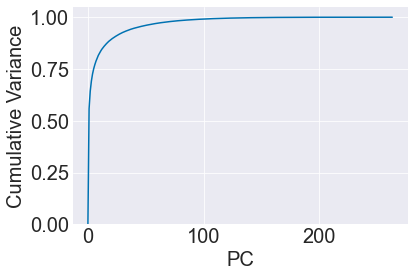

In [238]:
pca = pca_svd.PCA_SVD(pd.DataFrame(img_gray))
pca.pca([i for i in range(W)])

pca.elbow_plot()

The dimension of the image is (263, 320). The elbow plot shows that with 100 eigenvectors we can compress the image almost without loss by PCA. To make this extension more interesting, we will compress and then reconstruct the image with 50%, 75%, and almost 100% variance. 

To do that, we zoom in the elbow plot a little bit to find the number of eigenvectors that account for 50% and 75% variance.

*Caution: Note that because the dimension is (263, 320), we would have more eigenvectors than eigenvalues. Thus the elbow plot is not exact here.*

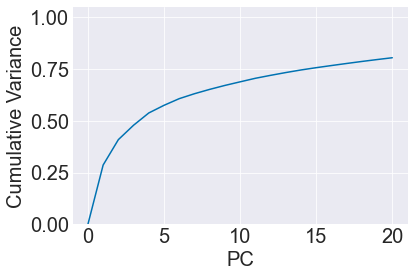

In [239]:
rgb_pca[0].elbow_plot(20)

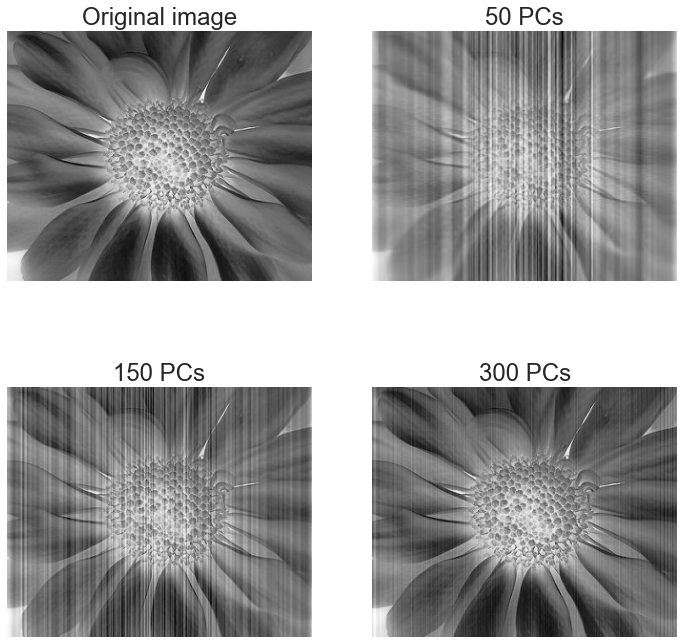

In [266]:
def project_back(pca, k, img):
    projected = pca.pca_then_project_back(k)
    return projected

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i in range(2):
    for j in range(2):
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        
axes[0, 0].imshow(img_gray)
axes[0, 0].set_title('Original image')

# projected = list(map(lambda x: x.pca_then_project_back(top_k=4), rgb_pca))
axes[0, 1].imshow(project_back(pca, 50, img_gray))
axes[0, 1].set_title('50 PCs')

axes[1, 0].imshow(project_back(pca, 150, img_gray))
axes[1, 0].set_title('150 PCs')

axes[1, 1].imshow(project_back(pca, 300, img_gray))
_ = axes[1, 1].set_title('300 PCs')

We can see that as the number of eigenvectors used to compress the image increases, the quality of the image after reprojection gets better and reconstruction error gets smaller. To make the notion of reconstruction error precise, we use [Frobenius Norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm) to measure how much the reconstructed image is off from the original image, which is defined as 

$$ \text{error} = (\sum_{i=1}^{m}\sum_{j=1}^{n} (a_{\text{original}} - a_{\text{reconstructed}})^2)^{\frac{1}{2}}$$ 

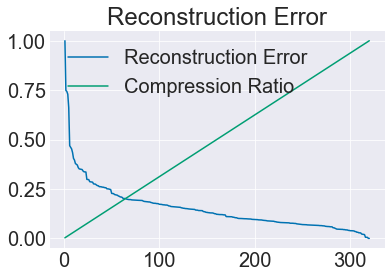

In [275]:
N = pca.e_vecs.shape[0]

compressed_sizes = []
errors = [] 
for i in range(1, N+1):
    compressed = pca.pca_project([j for j in range(i)])
    compressed_sizes.append(compressed.shape[0] * compressed.shape[1])
    
    Ar = project_back(pca, i, img_gray)
    diff = np.linalg.norm(img_gray - Ar, 'fro')
    errors.append(diff)

errors = errors / max(errors)
compressed_sizes = np.array(compressed_sizes) / np.max(compressed_sizes)

fig, ax = plt.subplots()
x = np.linspace(1, N, N)
ax.plot(x, errors, label='Reconstruction Error')
ax.plot(x, compressed_sizes, label='Compression Ratio')
ax.legend(shadow=True)
_ = ax.set_title('Reconstruction Error')

Our intuition gleaned from the images is confirmed here: reconstruction error gets smaller as the number of PCs used to compress image increases. But it is clear that the more eigenvectors used, the less image is compressed and more information is needed for the image. I think a good choice would be using 150 eigenvectors because the compression ratio is below 50% and reconstruction error is not too high. 